<a href="https://colab.research.google.com/github/lauracantik/deep_learning/blob/main/Deep_Learning_KELOMPOK7_Tugas8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import library yang dibutuhkan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


In [3]:
# preprocessing data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


In [4]:
# create CNN model
model = keras.Sequential(
    [
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32, 32, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dense(10),
    ]
)

In [5]:
# compile model
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])


In [6]:
# train model
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))


Epoch 1/5
1563/1563 [==============================] - 80s 50ms/step - loss: 1.4911 - accuracy: 0.4559 - val_loss: 1.1750 - val_accuracy: 0.5790
Epoch 2/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1201 - accuracy: 0.6048 - val_loss: 1.0280 - val_accuracy: 0.6336
Epoch 3/5
1563/1563 [==============================] - 78s 50ms/step - loss: 0.9564 - accuracy: 0.6636 - val_loss: 0.9410 - val_accuracy: 0.6764
Epoch 4/5
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8451 - accuracy: 0.7051 - val_loss: 0.8962 - val_accuracy: 0.6915
Epoch 5/5
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7662 - accuracy: 0.7334 - val_loss: 0.8633 - val_accuracy: 0.6980


In [7]:
# predict test dataset
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 5s 16ms/step


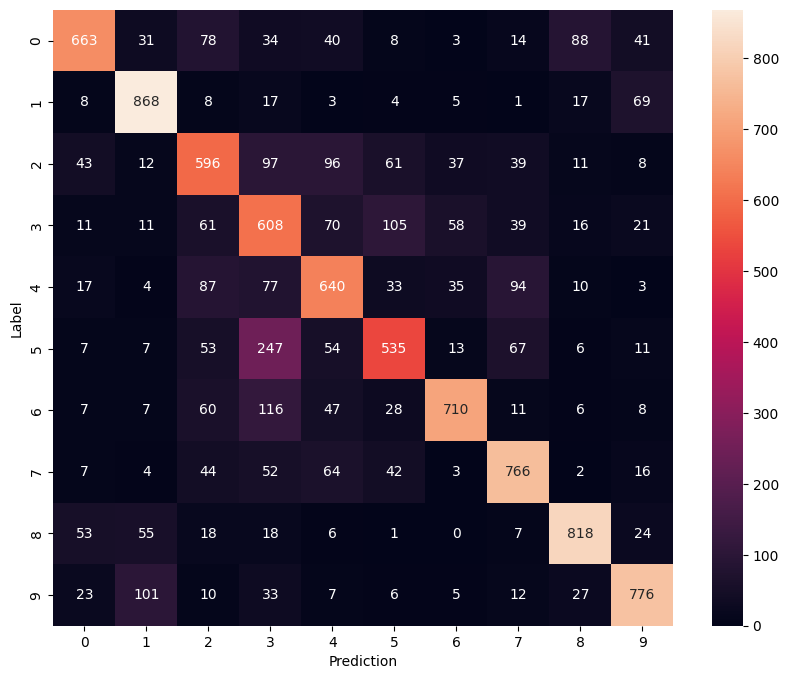

In [8]:
# confusion matrix
import seaborn as sns

confusion_mtx = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(confusion_mtx, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

In [9]:
# classification report
target_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

    airplane       0.79      0.66      0.72      1000
  automobile       0.79      0.87      0.83      1000
        bird       0.59      0.60      0.59      1000
         cat       0.47      0.61      0.53      1000
        deer       0.62      0.64      0.63      1000
         dog       0.65      0.54      0.59      1000
        frog       0.82      0.71      0.76      1000
       horse       0.73      0.77      0.75      1000
        ship       0.82      0.82      0.82      1000
       truck       0.79      0.78      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [10]:
# evaluation
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 7s - loss: 0.8633 - accuracy: 0.6980 - 7s/epoch - 22ms/step

Test accuracy: 0.6980000138282776
